# Student Grade Prediction Project

In [48]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
sg=pd.read_csv("studentsgrades.csv")
sg

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
sg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [4]:
sg.keys()

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
sg.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [6]:
sg.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


In [7]:
sg.shape

(571, 43)

In [8]:
sg.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# Exploratory Data Analysis

In [9]:
sg.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

<Axes: >

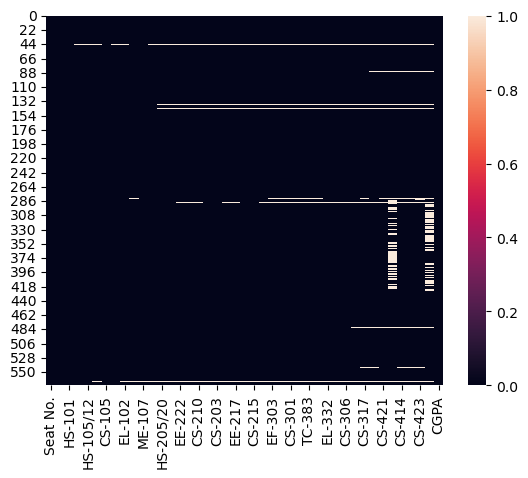

In [10]:
sns.heatmap(sg.isnull())

In [11]:
sg.skew()

CGPA   -0.497203
dtype: float64

In [12]:
sg.replace(np.nan,0, inplace = True)

In [13]:
sg_in = sg.drop(["CS-403","CS-421","CS-406","CS-414","CS-419","CS-423","CS-412", 'MT-442',"Seat No.","CGPA"], axis=1)
target = sg["CGPA"]


In [14]:
sg.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

<Axes: >

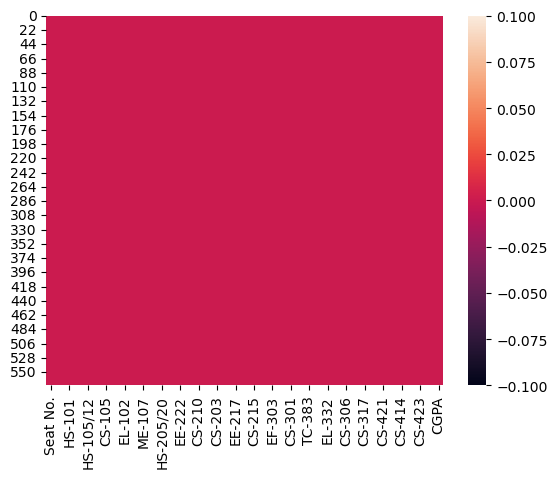

In [15]:
sns.heatmap(sg.isnull())

In [16]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [col for col in sg.columns if sg[col].dtype == 'object']

label_encoder = LabelEncoder()

for col in categorical_columns:
   
    sg[col] = sg[col].astype(str)
    sg[col] = label_encoder.fit_transform(sg[col])


In [17]:
sg.dtypes

Seat No.       int32
PH-121         int32
HS-101         int32
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105         int32
CS-106         int32
EL-102         int32
EE-119         int32
ME-107         int32
CS-107         int32
HS-205/20      int32
MT-222         int32
EE-222         int32
MT-224         int32
CS-210         int32
CS-211         int32
CS-203         int32
CS-214         int32
EE-217         int32
CS-212         int32
CS-215         int32
MT-331         int32
EF-303         int32
HS-304         int32
CS-301         int32
CS-302         int32
TC-383         int32
MT-442         int32
EL-332         int32
CS-318         int32
CS-306         int32
CS-312         int32
CS-317         int32
CS-403         int32
CS-421         int32
CS-406         int32
CS-414         int32
CS-419         int32
CS-423         int32
CS-412         int32
CGPA         float64
dtype: object

In [18]:
threshold = 3
def detect_outliers_zscore(sg):
    outliers = []
    mean = np.mean(sg)
    std_dev = np.std(sg)
    for i in sg:
        z_score = (i - mean) / std_dev
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

cgpa_outliers = detect_outliers_zscore(sg['CGPA'])

if cgpa_outliers:
    print("Outliers in CGPA column:", cgpa_outliers)
else:
    print("No outliers found in CGPA column")

Outliers in CGPA column: [1.0, 1.092, 0.998, 0.8]


In [19]:
from scipy.stats import zscore
sgzscore=np.abs(zscore(sg))
print(np.where(sgzscore>3))

(array([ 60,  60,  60,  91, 137, 143, 143, 281, 281, 281, 288, 288, 340,
       340, 352, 352, 382, 387, 387, 410, 423, 424, 432, 447, 447, 453,
       453, 454, 454, 513, 516, 522, 527, 543, 543, 550, 550, 557, 560,
       565], dtype=int64), array([ 3, 12, 20, 16,  3,  3, 42, 12, 16, 42, 12, 42, 25, 38, 25, 38, 38,
       38, 41, 38, 38, 38, 41, 37, 38, 37, 41, 37, 38, 41, 41, 41, 41, 37,
       41, 38, 41, 38, 38, 42], dtype=int64))


In [20]:
sg.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,9,7,9,10,10,9,6,...,9,9,9,9,3,1,9,4,3,2.205
1,1,0,9,11,10,6,6,10,1,11,...,11,10,7,10,3,6,7,7,4,2.008
2,2,0,3,1,6,5,0,6,5,3,...,4,4,1,7,1,1,1,3,1,3.608
3,3,9,7,11,10,10,2,11,9,10,...,11,7,11,9,6,4,8,8,8,1.906
4,4,2,2,3,5,1,0,3,5,1,...,6,5,5,6,3,1,3,3,1,3.448


In [21]:
sg.corr()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,1.000000,0.068592,-0.044036,-0.262401,-0.260551,-0.200340,0.000623,-0.306870,-0.034952,0.037852,...,-0.450781,-0.056159,-0.414432,-0.196024,0.270831,0.481231,-0.112536,-0.000689,0.274851,0.054342
PH-121,0.068592,1.000000,0.382436,0.556452,0.497219,0.459944,0.609990,0.284001,0.415215,0.571606,...,0.020735,0.386364,0.308438,0.231461,0.131418,0.138808,0.408423,0.056621,0.089879,-0.663135
HS-101,-0.044036,0.382436,1.000000,0.334650,0.472566,0.426705,0.400713,0.306397,0.343781,0.302590,...,0.203610,0.323125,0.223016,0.265971,0.246074,0.217880,0.256312,0.203382,0.143687,-0.537170
CY-105,-0.262401,0.556452,0.334650,1.000000,0.510866,0.534947,0.577049,0.373782,0.444571,0.454472,...,0.239912,0.379092,0.449231,0.277645,0.057441,-0.006061,0.367156,0.074152,-0.070842,-0.656443
HS-105/12,-0.260551,0.497219,0.472566,0.510866,1.000000,0.493522,0.480967,0.495668,0.359747,0.391483,...,0.248722,0.413813,0.441815,0.365546,0.114269,0.133298,0.422018,0.203107,0.063912,-0.612201
MT-111,-0.200340,0.459944,0.426705,0.534947,0.493522,1.000000,0.384105,0.493017,0.559400,0.407169,...,0.454518,0.501198,0.403067,0.463393,0.297595,0.221872,0.463315,0.368737,0.215823,-0.716971
CS-105,0.000623,0.609990,0.400713,0.577049,0.480967,0.384105,1.000000,0.276808,0.344655,0.498007,...,0.044216,0.319060,0.267700,0.182825,0.105382,0.109342,0.260482,0.011767,0.012286,-0.613169
CS-106,-0.306870,0.284001,0.306397,0.373782,0.495668,0.493017,0.276808,1.000000,0.333797,0.254957,...,0.437786,0.367131,0.418845,0.356434,0.142345,0.104158,0.386281,0.312825,0.171300,-0.521990
EL-102,-0.034952,0.415215,0.343781,0.444571,0.359747,0.559400,0.344655,0.333797,1.000000,0.445340,...,0.287867,0.402481,0.296622,0.321639,0.245570,0.233009,0.338437,0.331328,0.197545,-0.629657
EE-119,0.037852,0.571606,0.302590,0.454472,0.391483,0.407169,0.498007,0.254957,0.445340,1.000000,...,0.144826,0.405155,0.330413,0.326456,0.198102,0.209523,0.433412,0.222351,0.187788,-0.633992


<Axes: >

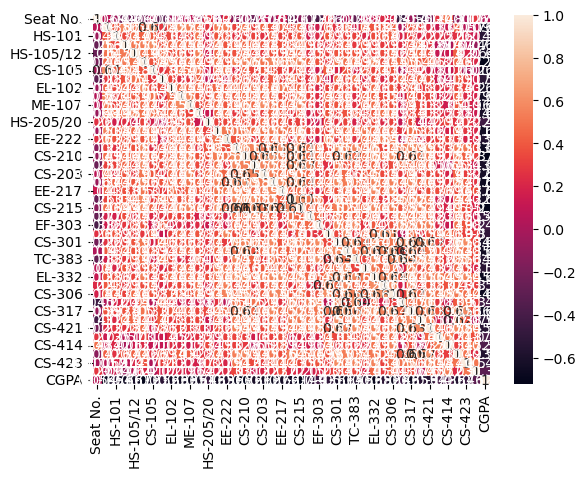

In [22]:
sns.heatmap(sg.corr(),annot=True)

# Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [col for col in sg.columns if sg[col].dtype == 'object']

le = LabelEncoder()
for col in categorical_columns:

    sg[col] = sg[col].astype(str)
    sg[col] = le.fit_transform(sg[col])
   
    sg[col] = sg[col].astype(float)

# Train and Test

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings ('ignore')

In [25]:
x=sg.iloc[:,0:20]
y=sg.iloc[:,20]

In [26]:
x.shape

(571, 20)

In [27]:
y.shape

(571,)

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
xtrain.shape

(456, 20)

In [30]:
xtest.shape

(115, 20)

In [31]:
ytrain.shape

(456,)

In [32]:
ytest.shape

(115,)

In [33]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [34]:
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
x=st.fit_transform(x)
x

array([[0.        , 0.41666667, 0.90909091, ..., 0.78571429, 0.84615385,
        0.76923077],
       [0.00175439, 0.        , 0.81818182, ..., 0.71428571, 0.53846154,
        0.76923077],
       [0.00350877, 0.        , 0.27272727, ..., 0.14285714, 0.07692308,
        0.23076923],
       ...,
       [0.99649123, 0.25      , 0.        , ..., 0.07142857, 0.38461538,
        0.30769231],
       [0.99824561, 0.        , 0.36363636, ..., 0.28571429, 0.46153846,
        0.53846154],
       [1.        , 0.5       , 0.81818182, ..., 0.64285714, 0.30769231,
        0.84615385]])

In [35]:
lm.coef_

array([ 0.00331825,  0.02861359, -0.01282759,  0.01552443,  0.04967485,
        0.08340617, -0.08132937,  0.00253019,  0.09726532, -0.08250018,
        0.01542822,  0.04179746,  0.0197607 ,  0.0833085 ,  0.06301285,
        0.19860401,  0.06774861,  0.04041228,  0.03820774,  0.13867749])

In [36]:
lm.intercept_

-0.9415210297388974

In [37]:
lm.score(xtrain,ytrain)

0.528204523436216

In [38]:
pred=lm.predict(xtest)
print("Predicted grade:",pred)
print("Actual grade",ytest)

Predicted grade: [6.36750211 2.43017681 5.82441105 7.9310906  2.6400371  2.83381583
 6.16046083 5.18580165 7.25576228 4.18002837 3.16270045 5.25954779
 2.56515022 4.53863631 2.35656104 6.20314796 7.1079561  1.44528341
 7.00546139 7.43974143 7.14606765 1.61826429 5.92279985 6.56920307
 4.61979908 2.68796013 4.87005656 6.45473787 3.80095181 2.86274924
 4.93515254 7.37233991 2.86659795 4.8371026  1.35319523 3.04299742
 5.51900297 1.79193612 4.81748307 6.85151802 0.82740179 3.09990377
 2.22543847 1.53723695 3.25710003 6.45093283 5.6996681  5.57046983
 3.96458282 2.04150309 3.14034752 1.53333584 3.79891708 1.6377855
 4.06097284 3.90339217 0.86586924 0.4578112  1.7305514  6.00570958
 0.93739177 1.31533448 2.42017939 4.02669431 3.13755465 5.01226915
 2.54187651 2.09503316 4.33232876 7.17760801 1.9391651  2.28257756
 4.68482522 2.20003531 2.34462313 2.65257109 3.37109468 7.65327917
 0.37650387 5.59202502 5.73350165 4.82700103 7.54920231 5.92029641
 1.32382755 2.91749941 2.64578473 5.7811837  5

In [39]:
print ('Mean Absolute Error:',mean_absolute_error(ytest,pred))
print ('Mean Squared Error:',mean_squared_error(ytest,pred))
print ('Root Mean Squared Error:',np.sqrt(mean_absolute_error(ytest,pred)))

Mean Absolute Error: 1.4025028873345835
Mean Squared Error: 2.9899275240731966
Root Mean Squared Error: 1.1842731472656904


In [40]:
print(cross_val_score(lm,x,y,cv=5,).mean())

0.40449724917725993


In [41]:
predicted_CGPA = list(lm.predict(xtest))
original_CGPA = list(ytest)

In [42]:
predicted_sg = pd.DataFrame({'predicted_CGPA': predicted_CGPA, 'original_CGPA': original_CGPA})
pd.DataFrame(predicted_sg)

,predicted_CGPA,original_CGPA
0,6.367502,4
1,2.430177,3
2,5.824411,6
3,7.931091,11
4,2.640037,4
...,...,...
110,3.888290,3
111,3.168989,3
112,2.876465,5
113,2.490895,3


In [43]:
predicted_CGPA_int = [int(value) for value in predicted_CGPA]
original_CGPA_int = [int(value) for value in original_CGPA]
predicted_sg = pd.DataFrame({'predicted_CGPA': predicted_CGPA_int, 'original_CGPA': original_CGPA_int})
print(predicted_sg)

     predicted_CGPA  original_CGPA
0                 6              4
1                 2              3
2                 5              6
3                 7             11
4                 2              4
..              ...            ...
110               3              3
111               3              3
112               2              5
113               2              3
114               4              3

[115 rows x 2 columns]


In [45]:
def predict_cgpa(grades):
    total_grades = grades.sum(axis=1)
    cgpa = total_grades.mean()  # Assuming simple average for CGPA calculation
    return cgpa

In [46]:
grades = pd.DataFrame({
    'Year1': [5],
    'Year2': [9],
    'Year3': [4],
    'Year4': [8]
})
predicted_cgpa = predict_cgpa(grades)

print("Predicted CGPA:", predicted_cgpa)

Predicted CGPA: 26.0
